## Pré-processamento de Dados
Fase de limpeza e tratamento de dados, para torna-los utilizáveis.

### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Importação dos dados
Já que os conjuntos de dados (Datasets) contém bastante dados, vou usar apenas um deles para auxiliar no tratamento e na limpeza, e depois será replicados no outros conjuntos. Assim reduzindo o custo computacional. 

In [17]:
path = "Dados SUS/CSV_FILE" #Caminho da pasta
# print(os.listdir(path)) #Comando para ver os arquivos na pasta

In [67]:
file = f"{path}/DOEXT22.csv"
df_geral = pd.read_csv(file,encoding='latin-1')
display(df_geral.head(10))
#print(df_geral.columns.to_list()) #Ver todas as colunas do dataset

C:\Users\Jnpx_\AppData\Local\Temp\ipykernel_11136\159626666.py:2: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df_geral = pd.read_csv(file,encoding='latin-1')


,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,2,30032022,1840.0,850.0,500345.0,3011967.0,455,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
1,1,2,6032022,400.0,841.0,412760.0,28101994.0,427,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
2,1,2,5052022,2233.0,833.0,330490.0,21082011.0,410,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
3,1,2,10042022,1357.0,851.0,510792.0,21042019.0,402,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108
4,1,2,26052022,954.0,829.0,291950.0,13061927.0,494,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131
5,1,2,23012022,600.0,835.0,351880.0,23051991.0,430,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167
6,1,2,22012022,2102.0,828.0,280590.0,23121977.0,444,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170
7,1,2,23012022,430.0,828.0,280140.0,22062001.0,420,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171
8,1,2,23012022,2340.0,828.0,280067.0,26032003.0,418,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172
9,1,2,22052022,1710.0,835.0,353240.0,30102020.0,401,1,1.0,...,SXXXSX,NaN,NaN,NaN,2062022.0,3.0,2062022.0,NaN,2.0,177


### Tramento de dados

Para não ser custoso computacionalmente, a seleção visa a redução da quantidade de colunas.

In [68]:
colunas_selecionadas = ['CONTADOR','DTNASC','DTOBITO','IDADE',
                        'SEXO','RACACOR','ESTCIV','ESC',
                        'ESC2010','OCUP','LOCOCOR','CIRCOBITO']

df_local = df_geral[['CONTADOR','NATURAL','CODMUNNATU','CODMUNRES','CODMUNOCOR']]

In [69]:
df_geral = pd.read_csv(file,encoding='latin-1',usecols=colunas_selecionadas) 
df_colunas_selecionadas = df_geral[colunas_selecionadas]

Selecionando apenas casos de suicídios, sabendo que o codigo para os casos é 2. 

In [70]:
df_s = df_colunas_selecionadas.loc[(df_geral['CIRCOBITO'])==2]

In [71]:
idade_indefinida = df_s.loc[(df_s['IDADE'])==999] #Pesquisa por idade indefinida
# display(idade_indefinida)

In [72]:
df_s = df_s.drop(index=idade_indefinida.index) #Drop idade indefinida

In [73]:
linha_auxiliar = df_s.loc[5]

In [74]:
pd.options.mode.copy_on_write = True
def ajustar_idade(linha):
    if(linha['IDADE']) > 400:
        linha['IDADE'] = int(linha['IDADE'] - 400)
    return linha

In [75]:
df_s = df_s.apply(lambda x:ajustar_idade(x),axis=1)

In [76]:
df_s[df_s['IDADE']==6]

,CONTADOR,DTNASC,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,LOCOCOR,CIRCOBITO
14141,152644.0,6092015.0,26062022.0,6.0,1.0,4.0,1.0,NaN,NaN,999991.0,3.0,2.0


In [77]:
df_s.drop(df_s[df_s['IDADE']==6].index,inplace=True)

In [78]:
df_s.drop(columns='DTNASC',inplace=True)

In [79]:
df_s

,CONTADOR,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,LOCOCOR,CIRCOBITO
5,167.0,23012022.0,30.0,1.0,4.0,5.0,4.0,3.0,782305.0,3.0,2.0
14,213.0,27012022.0,53.0,1.0,2.0,2.0,2.0,1.0,715210.0,3.0,2.0
19,277.0,8022022.0,52.0,1.0,1.0,1.0,2.0,1.0,512105.0,3.0,2.0
20,279.0,16022022.0,51.0,2.0,1.0,1.0,2.0,1.0,517310.0,3.0,2.0
31,450.0,23042022.0,42.0,1.0,4.0,4.0,9.0,9.0,252105.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
152910,1544077.0,6052022.0,29.0,1.0,1.0,4.0,4.0,2.0,715615.0,1.0,2.0
152921,1544158.0,24042022.0,15.0,1.0,5.0,NaN,1.0,0.0,NaN,5.0,2.0
152926,1544202.0,1052022.0,18.0,2.0,5.0,NaN,1.0,0.0,NaN,3.0,2.0
152936,1544229.0,24122022.0,26.0,1.0,5.0,NaN,3.0,2.0,NaN,6.0,2.0


(array([  6,  17,  30,  53,  94, 117, 153, 200, 254, 287, 289, 309, 327,
       326, 345, 307, 349, 329, 325, 325, 323, 302, 301, 338, 337, 339,
       350, 312, 311, 369, 323, 315, 313, 320, 300, 318, 280, 264, 246,
       247, 247, 245, 225, 236, 204, 242, 228, 222, 237, 194, 181, 182,
       167, 158, 136, 143, 138, 151, 138, 122, 112,  91, 100,  97,  79,
        86,  77,  75,  57,  64,  48,  37,  49,  41,  30,  35,  34,  19,
         9,  15,  17,  11,   7,  12,   2,   1,   3,   1,   1], dtype=int64), array([ 9.        , 10.01123596, 11.02247191, 12.03370787, 13.04494382,
       14.05617978, 15.06741573, 16.07865169, 17.08988764, 18.1011236 ,
       19.11235955, 20.12359551, 21.13483146, 22.14606742, 23.15730337,
       24.16853933, 25.17977528, 26.19101124, 27.20224719, 28.21348315,
       29.2247191 , 30.23595506, 31.24719101, 32.25842697, 33.26966292,
       34.28089888, 35.29213483, 36.30337079, 37.31460674, 38.3258427 ,
       39.33707865, 40.34831461, 41.35955056, 42.37078652,

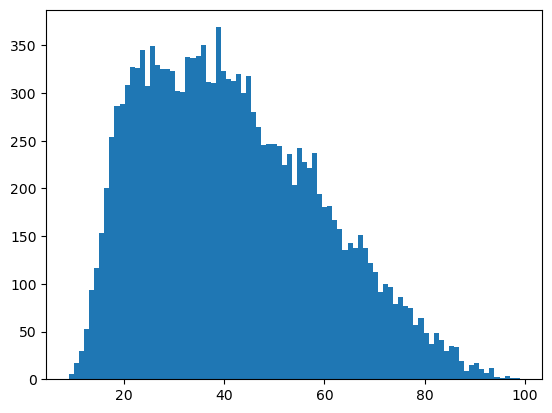

In [80]:
plt.hist(df_s['IDADE'],bins=89)
print(np.histogram(df_s['IDADE'],bins=89))
plt.show()

In [82]:
val = df_s['OCUP'].value_counts() #Buscar todas as Ocupações (CBO2002)